# Уменьшение потребление электроэнергии на этапе обработки стали 
# Описание этапа обработки
Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 
Из сплава выводится сера (этот процесс — десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (от англ. tribe — «масса»).
Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.
Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (от англ. slab — «плита»).
# Описание данных

`data_arc_new.csv` — данные об электродах;
* key — номер партии;
* Начало нагрева дугой — время начала нагрева;
* Конец нагрева дугой — время окончания нагрева;
* Активная мощность — значение активной мощности;
* Реактивная мощность — значение реактивной мощности.

`data_bulk_new.csv` — данные о подаче сыпучих материалов (объём);
* key — номер партии;
* Bulk 1 … Bulk 15 — объём подаваемого материала.

`data_bulk_time_new.csv` — данные о подаче сыпучих материалов (время);
* key — номер партии;
* Bulk 1 … Bulk 15 — время подачи материала.

`data_gas_new.csv` — данные о продувке сплава газом;
* key — номер партии;
* Газ 1 — объём подаваемого газа.

`data_temp_new.csv` — результаты измерения температуры;
* key — номер партии;
* Время замера — время замера;
* Температура — значение температуры.

`data_wire_new.csv` — данные о проволочных материалах (объём);
* key — номер партии;
* Wire 1 … Wire 9 — объём подаваемых проволочных материалов.

`data_wire_time_new.csv` — данные о проволочных материалах (время).
* key — номер партии;
* Wire 1 … Wire 9 — время подачи проволочных материалов.

Во всех файлах столбец key содержит номер партии. В файлах может быть несколько строк с одинаковым значением key: они соответствуют разным итерациям обработки.


## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import cross_val_score


In [2]:
pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')

RANDOM_STATE = 110825

In [3]:
def dataset_info(data):
    print('Общая информация о датасете')
    display(data.info())
    print('\nПервые 5 строк датасета')
    display(data.head())
    print('\nсколько пропусков имеет каждый отдельный столбец:')
    display(data.isna().sum())
    print('\nКоличество дубликатов:')
    display(data.duplicated().sum())
    print('\nОписание: ')
    display(data.describe())
    print('\nКоличество строк и столбцов: ')
    display(data.shape)   

### data_arc_new.csv — данные об электродах

In [4]:
data_arc_new = pd.read_csv('/datasets/data_arc_new.csv', parse_dates = ['Начало нагрева дугой', 'Конец нагрева дугой'])
data_arc_new.columns = ['key', 'start_heating','end_heating', 'active_power', 'reactive_power']


In [5]:
dataset_info(data_arc_new)

Общая информация о датасете
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   key             14876 non-null  int64         
 1   start_heating   14876 non-null  datetime64[ns]
 2   end_heating     14876 non-null  datetime64[ns]
 3   active_power    14876 non-null  float64       
 4   reactive_power  14876 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 581.2 KB


None


Первые 5 строк датасета


,key,start_heating,end_heating,active_power,reactive_power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691



сколько пропусков имеет каждый отдельный столбец:


key               0
start_heating     0
end_heating       0
active_power      0
reactive_power    0
dtype: int64


Количество дубликатов:


0


Описание: 


,key,active_power,reactive_power
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.662752,0.438986
std,934.571502,0.258885,5.873485
min,1.000000,0.223120,-715.479924
25%,806.000000,0.467115,0.337175
50%,1617.000000,0.599587,0.441639
75%,2429.000000,0.830070,0.608201
max,3241.000000,1.463773,1.270284



Количество строк и столбцов: 


(14876, 5)

Всего 3241 партия, значение `key` повторяется по несколько раз для каждой партии

Есть аномалии `-715.479924`

### data_bulk_new.csv — данные о подаче сыпучих материалов (объём);

In [6]:
data_bulk_new = pd.read_csv('/datasets/data_bulk_new.csv')

In [7]:
dataset_info(data_bulk_new)

Общая информация о датасете
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


None


Первые 5 строк датасета


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0



сколько пропусков имеет каждый отдельный столбец:


key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64


Количество дубликатов:


0


Описание: 


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000



Количество строк и столбцов: 


(3129, 16)

Количество записей о подаче сыпучих материалов 3129, что меньше количества партий, значит есть партии в которые сыпучие материалы не добавлялись

`Bulk 8` имеет только 1 значение

### data_bulk_time_new.csv — данные о подаче сыпучих материалов (время);

In [8]:
data_bulk_time_new = pd.read_csv('/datasets/data_bulk_time_new.csv', parse_dates = ['Bulk 1','Bulk 2','Bulk 3','Bulk 4','Bulk 5',
                                                      'Bulk 6','Bulk 7','Bulk 8','Bulk 9','Bulk 10','Bulk 11',
                                                      'Bulk 12','Bulk 13','Bulk 14','Bulk 15'])

In [9]:
dataset_info(data_bulk_time_new)

Общая информация о датасете
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   key      3129 non-null   int64         
 1   Bulk 1   252 non-null    datetime64[ns]
 2   Bulk 2   22 non-null     datetime64[ns]
 3   Bulk 3   1298 non-null   datetime64[ns]
 4   Bulk 4   1014 non-null   datetime64[ns]
 5   Bulk 5   77 non-null     datetime64[ns]
 6   Bulk 6   576 non-null    datetime64[ns]
 7   Bulk 7   25 non-null     datetime64[ns]
 8   Bulk 8   1 non-null      datetime64[ns]
 9   Bulk 9   19 non-null     datetime64[ns]
 10  Bulk 10  176 non-null    datetime64[ns]
 11  Bulk 11  177 non-null    datetime64[ns]
 12  Bulk 12  2450 non-null   datetime64[ns]
 13  Bulk 13  18 non-null     datetime64[ns]
 14  Bulk 14  2806 non-null   datetime64[ns]
 15  Bulk 15  2248 non-null   datetime64[ns]
dtypes: datetime64[ns](15), int64(1)
memory usage: 391.

None


Первые 5 строк датасета


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaT,NaT,NaT,2019-05-03 11:28:48,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:24:31,NaT,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaT,NaT,NaT,2019-05-03 11:36:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:53:30,NaT,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaT,NaT,NaT,2019-05-03 12:32:39,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:27:13,NaT,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaT,NaT,NaT,2019-05-03 12:43:22,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:58:00,NaT,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaT,NaT,NaT,2019-05-03 13:30:47,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 13:30:47,NaT,2019-05-03 13:34:12,2019-05-03 13:30:47



сколько пропусков имеет каждый отдельный столбец:


key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64


Количество дубликатов:


0


Описание: 


,key
count,3129.000000
mean,1624.383509
std,933.337642
min,1.000000
25%,816.000000
50%,1622.000000
75%,2431.000000
max,3241.000000



Количество строк и столбцов: 


(3129, 16)

Такое же количетсво пропусков как и в датасете `data_bulk_new`

### data_gas_new.csv — данные о продувке сплава газом

In [10]:
data_gas_new = pd.read_csv('/datasets/data_gas_new.csv')

In [11]:
dataset_info(data_gas_new)

Общая информация о датасете
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


None


Первые 5 строк датасета


,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692



сколько пропусков имеет каждый отдельный столбец:


key      0
Газ 1    0
dtype: int64


Количество дубликатов:


0


Описание: 


,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040



Количество строк и столбцов: 


(3239, 2)

### data_temp_new.csv — результаты измерения температуры

In [12]:
data_temp_new = pd.read_csv('/datasets/data_temp_new.csv', parse_dates = ['Время замера'])

In [13]:
dataset_info(data_temp_new)

Общая информация о датасете
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   key           18092 non-null  int64         
 1   Время замера  18092 non-null  datetime64[ns]
 2   Температура   14665 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 424.2 KB


None


Первые 5 строк датасета


,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0



сколько пропусков имеет каждый отдельный столбец:


key                0
Время замера       0
Температура     3427
dtype: int64


Количество дубликатов:


0


Описание: 


,key,Температура
count,18092.000000,14665.000000
mean,1616.460977,1590.722741
std,934.641385,20.394381
min,1.000000,1191.000000
25%,807.750000,1580.000000
50%,1618.000000,1590.000000
75%,2429.000000,1599.000000
max,3241.000000,1705.000000



Количество строк и столбцов: 


(18092, 3)

Температуру измерили 18092 раза, есть 3427 пропуска

### data_wire_new.csv — данные о проволочных материалах (объём);

In [14]:
data_wire_new = pd.read_csv('/datasets/data_wire_new.csv')

In [15]:
dataset_info(data_wire_new)

Общая информация о датасете
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


None


Первые 5 строк датасета


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN



сколько пропусков имеет каждый отдельный столбец:


key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64


Количество дубликатов:


0


Описание: 


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442841,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060483,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604



Количество строк и столбцов: 


(3081, 10)

`key` имеет 3081 значение

### data_wire_time_new.csv — данные о проволочных материалах (время).

In [16]:
data_wire_time_new = pd.read_csv('/datasets/data_wire_time_new.csv', parse_dates = ['Wire 1', 'Wire 2', 'Wire 3', 
                                                                                   'Wire 4', 'Wire 5', 'Wire 6',
                                                                                   'Wire 7', 'Wire 8', 'Wire 9'])

In [17]:
dataset_info(data_wire_time_new)

Общая информация о датасете
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   key     3081 non-null   int64         
 1   Wire 1  3055 non-null   datetime64[ns]
 2   Wire 2  1079 non-null   datetime64[ns]
 3   Wire 3  63 non-null     datetime64[ns]
 4   Wire 4  14 non-null     datetime64[ns]
 5   Wire 5  1 non-null      datetime64[ns]
 6   Wire 6  73 non-null     datetime64[ns]
 7   Wire 7  11 non-null     datetime64[ns]
 8   Wire 8  19 non-null     datetime64[ns]
 9   Wire 9  29 non-null     datetime64[ns]
dtypes: datetime64[ns](9), int64(1)
memory usage: 240.8 KB


None


Первые 5 строк датасета


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,2,2019-05-03 11:36:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,3,2019-05-03 12:11:46,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,4,2019-05-03 12:43:22,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaT,NaT,NaT,NaT,NaT,NaT,NaT



сколько пропусков имеет каждый отдельный столбец:


key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64


Количество дубликатов:


0


Описание: 


,key
count,3081.000000
mean,1623.426485
std,932.996726
min,1.000000
25%,823.000000
50%,1619.000000
75%,2434.000000
max,3241.000000



Количество строк и столбцов: 


(3081, 10)

### Промежуточный вывод
Загружены датасеты, столбцы с датами приведены к формату datetime  

Имеются пропуски, которые могут быть вызваны разными причинами (отсутсвие необходимсоти, ошибка переноса данных и т.д.)

Датасеты `data_bulk_time_new`, `data_wire_time_new` и `data_wire_time_new` не несут ценности для определния целевого признака 

## Исследовательский анализ и предобработка данных
 

### data_arc_new

In [18]:
def qua_plot(df, x_name, suptitle):
    fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (18,6))
    sns.histplot(data = df,x = x_name, ax=axs[0], bins = 50, kde=True)
    axs[0].set_xlabel(x_name)
    axs[0].set_ylabel('Количество')
    axs[0].set_title('Гистограмма')
    sns.boxplot(data = df,x = x_name, ax=axs[1])
    axs[1].set_title('Диаграмма размаха')
    axs[1].set_xlabel(x_name)
    fig.suptitle(suptitle);

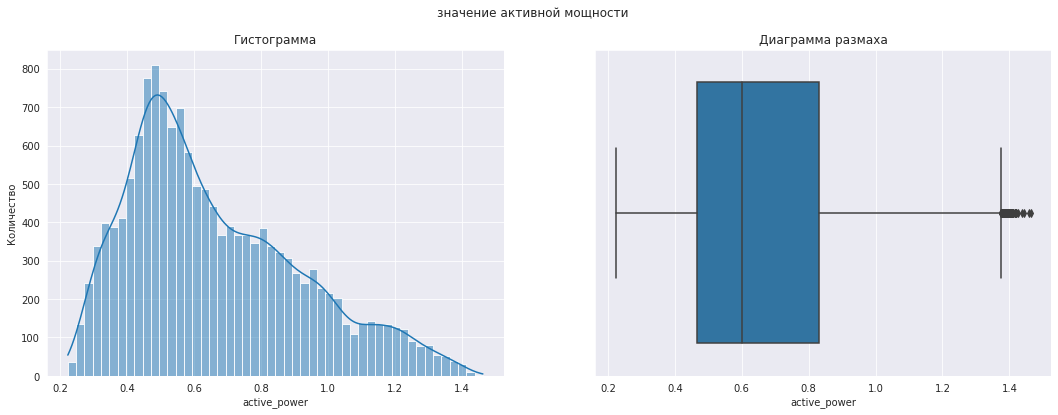

In [19]:
qua_plot(data_arc_new, 'active_power', 'значение активной мощности')

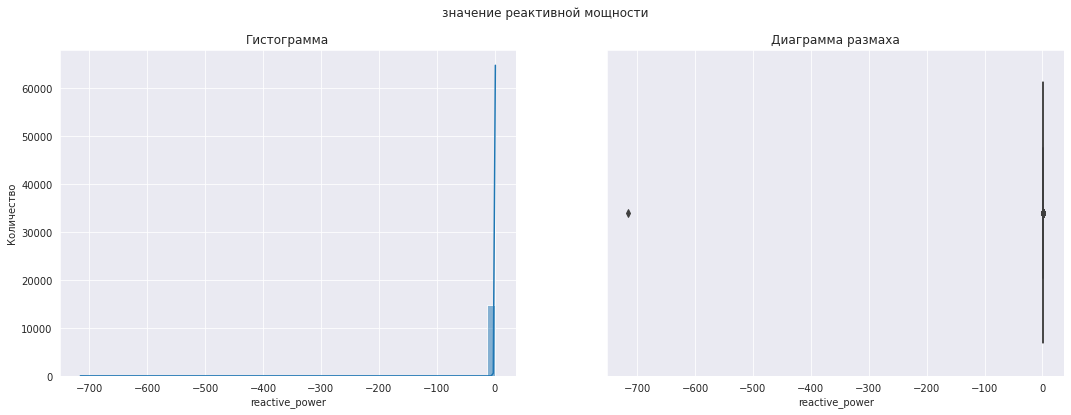

In [20]:
qua_plot(data_arc_new, 'reactive_power', 'значение реактивной мощности')

Удалим аномалию

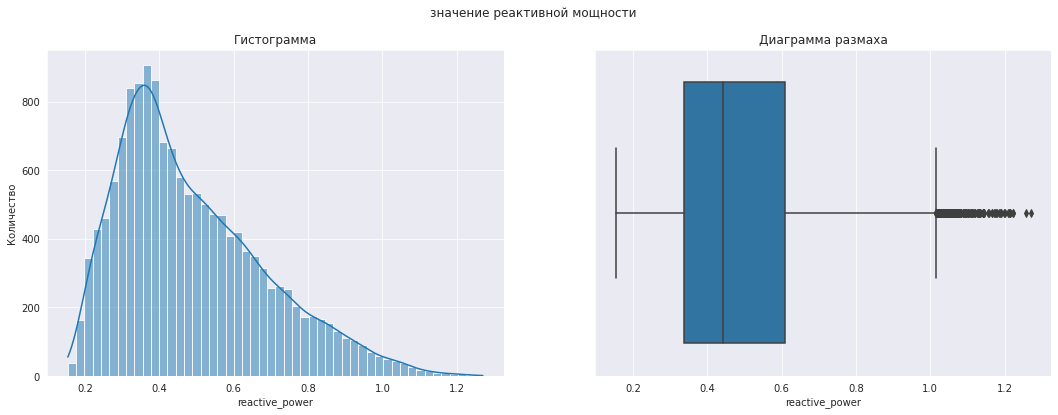

In [21]:
data_arc_new = data_arc_new.query('reactive_power > 0')
qua_plot(data_arc_new, 'reactive_power', 'значение реактивной мощности')

Создадим новый признак `real_power` (полная мощность)  по т. пифагора (активная^2 + реактивная^2)
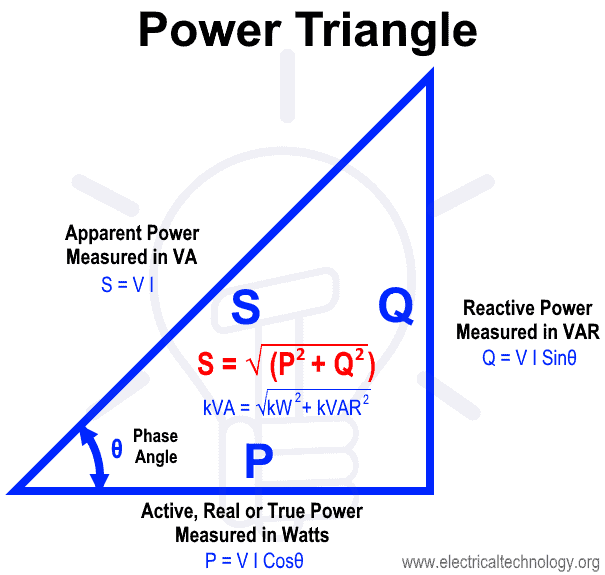

In [22]:
data_arc_new['real_power'] = (data_arc_new['active_power']**2 + data_arc_new['reactive_power']**2)**0.5

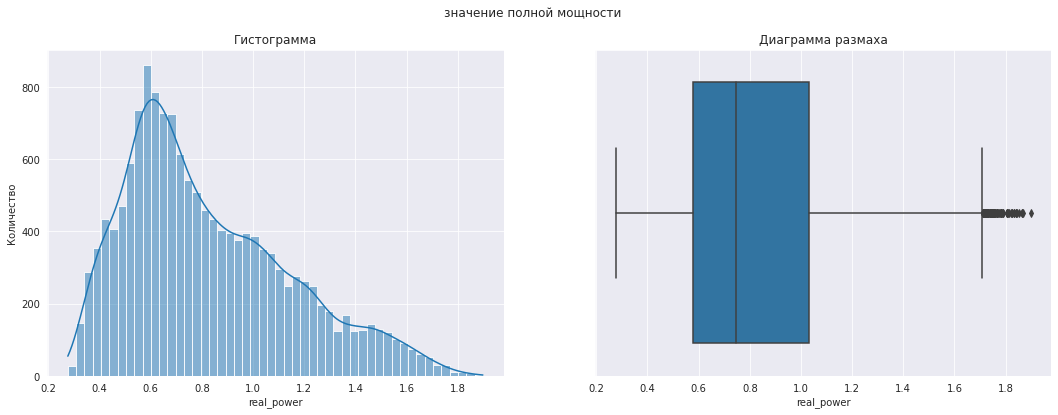

In [23]:
qua_plot(data_arc_new, 'real_power', 'значение полной мощности')

Мощности имеют нормальное распределение со смещением влево

Создадим признак отвечающий за суммарное время нагрева `heating_total`

In [24]:
data_arc_new['heating_total'] = data_arc_new['end_heating'] - data_arc_new['start_heating']
data_arc_new['heating_total'] = data_arc_new['heating_total'].dt.seconds

data_arc_new.head(15)

,key,start_heating,end_heating,active_power,reactive_power,real_power,heating_total
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253,0.371123,228
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438,0.902319,185
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460,0.722536,172
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979,0.642824,365
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691,1.079934,148
5,2,2019-05-03 11:34:14,2019-05-03 11:36:31,0.381124,0.220351,0.440239,137
6,2,2019-05-03 11:38:50,2019-05-03 11:44:28,0.261665,0.205527,0.332731,338
7,2,2019-05-03 11:46:19,2019-05-03 11:48:25,0.710297,0.484962,0.860064,126
8,2,2019-05-03 11:49:48,2019-05-03 11:53:18,0.786322,0.542517,0.955315,210
9,3,2019-05-03 12:06:54,2019-05-03 12:11:34,1.101678,0.820856,1.373863,280


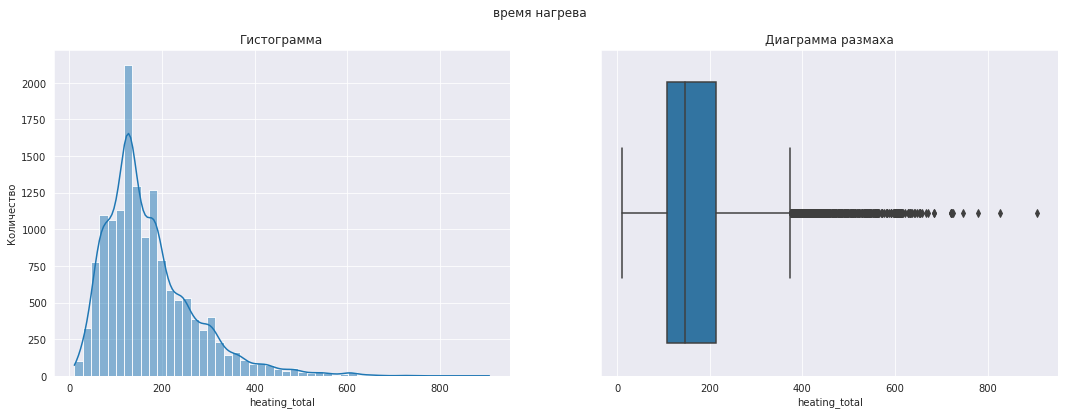

In [25]:
qua_plot(data_arc_new, 'heating_total', 'время нагрева')

Посчитаем работу умножив общую мощность на время

In [26]:
data_arc_new['energy'] = data_arc_new['real_power']*data_arc_new['heating_total']

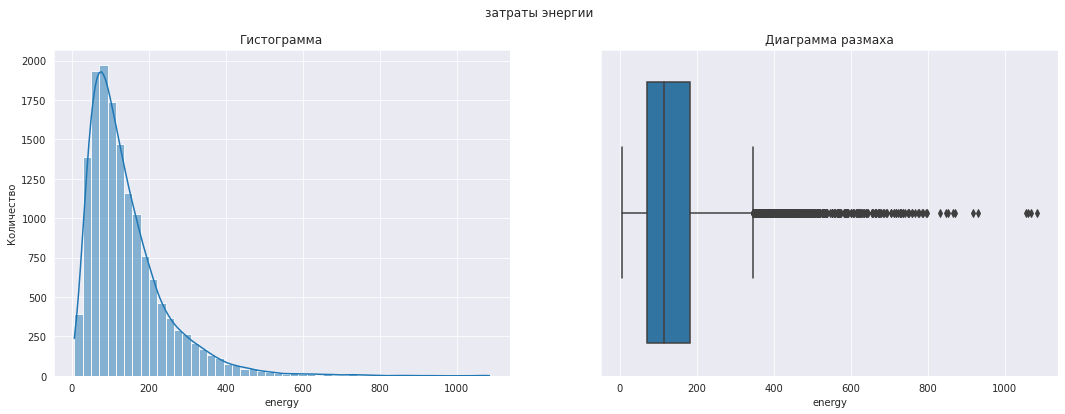

In [27]:
qua_plot(data_arc_new, 'energy', 'затраты энергии')

In [28]:
data_arc_new.groupby(by = 'key').sum().head()


,active_power,reactive_power,real_power,heating_total,energy
key,,,,,
1,3.036730,2.142821,3.718736,1098,770.282114
2,2.139408,1.453357,2.588349,811,481.760005
3,4.063641,2.937457,5.019223,655,722.837668
4,2.706489,2.056992,3.400038,741,683.455597
5,2.252950,1.687991,2.816980,869,512.169934


In [29]:
agg_funcs = {
    'active_power': 'mean',
    'reactive_power': 'mean',
    'real_power': 'mean',
    'heating_total': 'sum',
    'energy': 'sum'
}

data_arc_new = (data_arc_new.groupby('key').agg(agg_funcs))

data_arc_new.head()

,active_power,reactive_power,real_power,heating_total,energy
key,,,,,
1,0.607346,0.428564,0.743747,1098,770.282114
2,0.534852,0.363339,0.647087,811,481.760005
3,0.812728,0.587491,1.003845,655,722.837668
4,0.676622,0.514248,0.850010,741,683.455597
5,0.563238,0.421998,0.704245,869,512.169934


### data_bulk_new

Заполним пропуски нулями

In [30]:
data_bulk_new = data_bulk_new.fillna(0).astype('int').set_index('key')
data_bulk_new.head()

,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
key,,,,,,,,,,,,,,,
1,0,0,0,43,0,0,0,0,0,0,0,206,0,150,154
2,0,0,0,73,0,0,0,0,0,0,0,206,0,149,154
3,0,0,0,34,0,0,0,0,0,0,0,205,0,152,153
4,0,0,0,81,0,0,0,0,0,0,0,207,0,153,154
5,0,0,0,78,0,0,0,0,0,0,0,203,0,151,152


### data_gas_new

In [31]:
data_gas_new.head()
data_gas_new=data_gas_new.set_index('key')

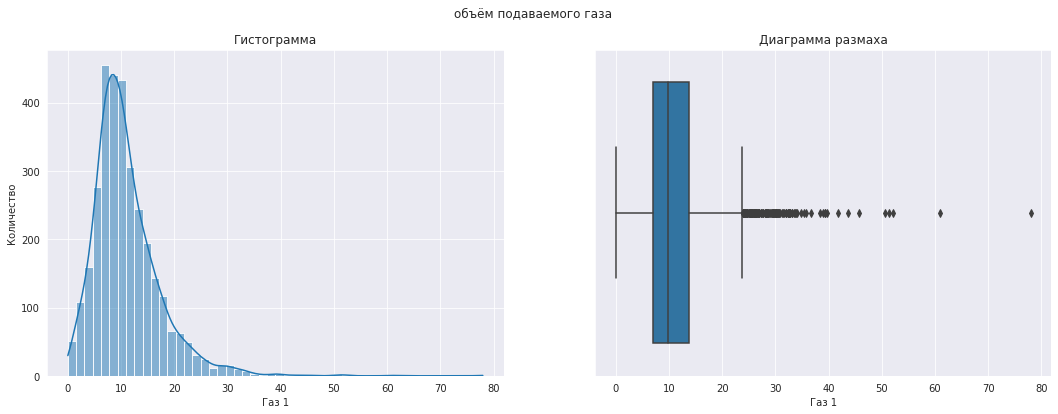

In [32]:
qua_plot(data_gas_new, 'Газ 1', 'объём подаваемого газа')

In [33]:
data_gas_new.columns = ['gas']
data_gas_new

,gas
key,
1,29.749986
2,12.555561
3,28.554793
4,18.841219
5,5.413692
...,...
3237,5.543905
3238,6.745669
3239,16.023518


In [34]:
all_keys = set(range(1, 3242)) 
existing_keys = set(data_gas_new.index)
missing_keys = sorted(all_keys - existing_keys)
missing_keys

[193, 259]

В двух партиях газ не был подан

### data_temp_new

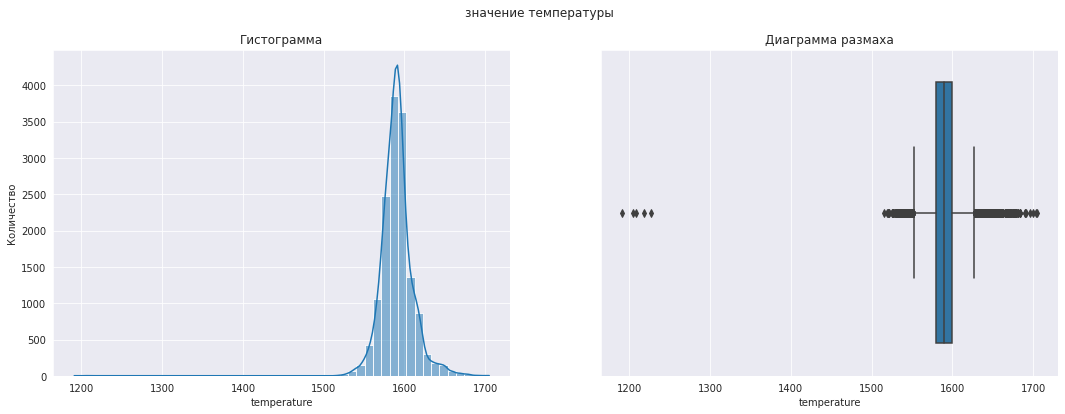

In [35]:
data_temp_new.columns = ['key', 'time', 'temperature']
qua_plot(data_temp_new, 'temperature', 'значение температуры')

Все что ниже 1400 будем считать как брак, т.к. при такой температуре происходит кристализация

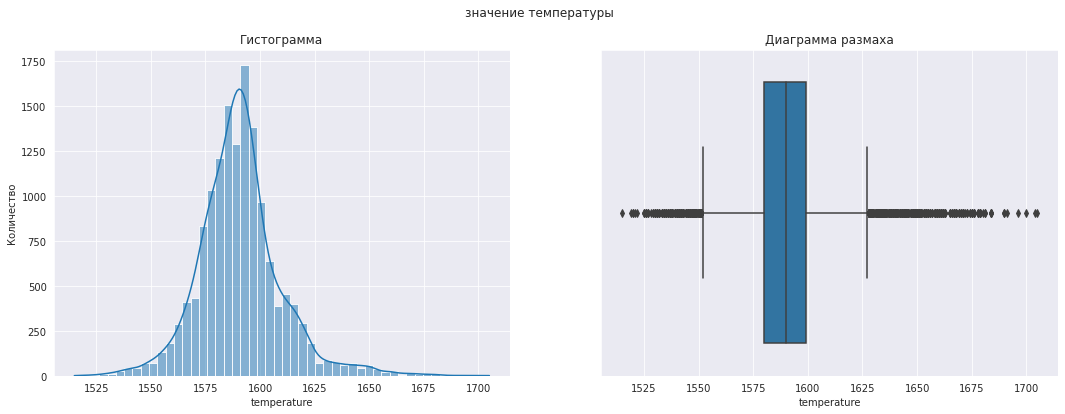

In [36]:
data_temp_new = data_temp_new.query('temperature >= 1400')
qua_plot(data_temp_new, 'temperature', 'значение температуры')

In [37]:
data_temp_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14660 entries, 0 to 18086
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   key          14660 non-null  int64         
 1   time         14660 non-null  datetime64[ns]
 2   temperature  14660 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 458.1 KB


In [38]:
data_temp_new[data_temp_new['key'] == 2501]

,key,time,temperature
13931,2501,2019-08-10 14:41:14,1587.0


In [39]:
data_temp_new['key'].value_counts()

2108    17
1513    16
1689    16
46      14
322     14
        ..
3236     1
2963     1
2955     1
2947     1
2525     1
Name: key, Length: 3215, dtype: int64

In [40]:
data_temp_new['key'].nunique()

3215

In [41]:
measurements_count = data_temp_new.groupby('key').size().to_frame('measurements_count')
measurements_count.sort_values(by='key', ascending=False).head()

,measurements_count
key,
3241,1
3240,1
3239,1
3238,1
3237,1


In [42]:
measurements_count.describe()

,measurements_count
count,3215.000000
mean,4.559876
std,2.405800
min,1.000000
25%,3.000000
50%,5.000000
75%,6.000000
max,17.000000


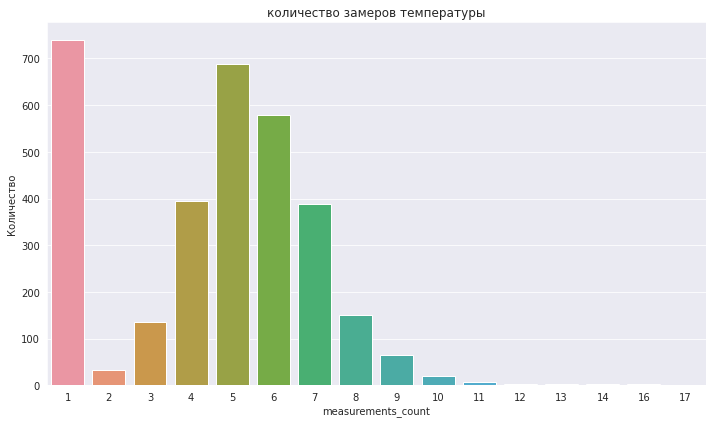

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(data=measurements_count, x='measurements_count')
plt.xlabel('measurements_count')
plt.ylabel('Количество')
plt.title('количество замеров температуры')
plt.tight_layout()
plt.show()

Большое количество значений 1, из-за чего мы не сможем посчитать разницу температур

In [44]:
measurements_count[measurements_count['measurements_count'] == 1]

,measurements_count
key,
195,1
279,1
2500,1
2501,1
2502,1
...,...
3237,1
3238,1
3239,1


In [45]:
data_temp_new[data_temp_new['key'] == 195]

,key,time,temperature
1105,195,2019-05-11 00:01:36,1583.0


In [46]:
measurements_count[measurements_count['measurements_count'] == 17]

,measurements_count
key,
2108,17


In [47]:
data_temp_new[data_temp_new['key'] == 2108]

,key,time,temperature
11825,2108,2019-07-27 10:41:03,1639.0
11826,2108,2019-07-27 11:07:14,1626.0
11827,2108,2019-07-27 11:13:27,1604.0
11828,2108,2019-07-27 11:15:35,1612.0
11829,2108,2019-07-27 11:19:16,1621.0
11830,2108,2019-07-27 11:23:02,1535.0
11831,2108,2019-07-27 13:39:22,1577.0
11832,2108,2019-07-27 13:45:09,1585.0
11833,2108,2019-07-27 13:49:26,1559.0
11834,2108,2019-07-27 14:01:13,1562.0


In [48]:
data_temp_new[data_temp_new['key'] == 2603]

,key,time,temperature
14543,2603,2019-08-14 12:04:17,1605.0


In [49]:
measurements_count = measurements_count.query('measurements_count > 1')

In [50]:
data_temp_new_filtered = data_temp_new[data_temp_new['key'].isin(measurements_count.index)]

In [51]:
data_temp_new_filtered['key'].nunique() 

2475

In [52]:
data_temp_new_filtered.head()      

,key,time,temperature
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0


In [53]:
data_temp_final = data_temp_new_filtered.groupby(by = 'key').agg(['first', 'last']).reset_index()
data_temp_final.columns = ['key', 'first_time', 'last_time', 'first_temperature', 'last_temperature']
data_temp_final['time_difference'] = data_temp_final['last_time'] - data_temp_final['first_time']
data_temp_final['time_difference'] = data_temp_final['time_difference'].dt.seconds
data_temp_final.drop(['first_time', 'last_time'], axis= 1 , inplace= True)
data_temp_final.head()


,key,first_temperature,last_temperature,time_difference
0,1,1571.0,1613.0,1714
1,2,1581.0,1602.0,1265
2,3,1596.0,1599.0,1753
3,4,1601.0,1625.0,1220
4,5,1576.0,1602.0,1536


In [54]:
data_temp_final['time_difference'].describe()

count     2475.000000
mean      2279.871111
std       1373.958293
min        270.000000
25%       1544.500000
50%       2006.000000
75%       2738.500000
max      23674.000000
Name: time_difference, dtype: float64

In [55]:
data_temp_final.shape

(2475, 4)

### data_wire_new

In [56]:
data_wire_new = data_wire_new.fillna(0)
data_wire_new.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Промежуточный вывод
Провели исследоватльский анализ данных, удалили аномалии в реактивной мощности, перегреве

Добавили признаки работы, полной мощности и общего затраченого времени в датасет `data_arc_new`

Заполнили пропуски нулями в датасетах `data_bulk_new` и `data_wire_new`

Удалили данные с одним измерением температуры

## Объединение данных

In [57]:
data = data_arc_new.merge(data_temp_final, on='key', how='inner')
data = data.merge(data_gas_new, on='key', how='inner')
data = data.merge(data_bulk_new, on='key', how='inner')
data = data.merge(data_wire_new, on='key', how='inner')
data.drop(['key'], axis= 1 , inplace= True)


In [58]:
dataset_info(data)

Общая информация о датасете
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2329 entries, 0 to 2328
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   active_power       2329 non-null   float64
 1   reactive_power     2329 non-null   float64
 2   real_power         2329 non-null   float64
 3   heating_total      2329 non-null   int64  
 4   energy             2329 non-null   float64
 5   first_temperature  2329 non-null   float64
 6   last_temperature   2329 non-null   float64
 7   time_difference    2329 non-null   int64  
 8   gas                2329 non-null   float64
 9   Bulk 1             2329 non-null   int64  
 10  Bulk 2             2329 non-null   int64  
 11  Bulk 3             2329 non-null   int64  
 12  Bulk 4             2329 non-null   int64  
 13  Bulk 5             2329 non-null   int64  
 14  Bulk 6             2329 non-null   int64  
 15  Bulk 7             2329 non-null   int64  
 

None


Первые 5 строк датасета


,active_power,reactive_power,real_power,heating_total,energy,first_temperature,last_temperature,time_difference,gas,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,0.607346,0.428564,0.743747,1098,770.282114,1571.0,1613.0,1714,29.749986,0,0,0,43,0,0,0,0,0,0,0,206,0,150,154,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.534852,0.363339,0.647087,811,481.760005,1581.0,1602.0,1265,12.555561,0,0,0,73,0,0,0,0,0,0,0,206,0,149,154,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.812728,0.587491,1.003845,655,722.837668,1596.0,1599.0,1753,28.554793,0,0,0,34,0,0,0,0,0,0,0,205,0,152,153,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.676622,0.514248,0.850010,741,683.455597,1601.0,1625.0,1220,18.841219,0,0,0,81,0,0,0,0,0,0,0,207,0,153,154,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.563238,0.421998,0.704245,869,512.169934,1576.0,1602.0,1536,5.413692,0,0,0,78,0,0,0,0,0,0,0,203,0,151,152,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0



сколько пропусков имеет каждый отдельный столбец:


active_power         0
reactive_power       0
real_power           0
heating_total        0
energy               0
first_temperature    0
last_temperature     0
time_difference      0
gas                  0
Bulk 1               0
Bulk 2               0
Bulk 3               0
Bulk 4               0
Bulk 5               0
Bulk 6               0
Bulk 7               0
Bulk 8               0
Bulk 9               0
Bulk 10              0
Bulk 11              0
Bulk 12              0
Bulk 13              0
Bulk 14              0
Bulk 15              0
Wire 1               0
Wire 2               0
Wire 3               0
Wire 4               0
Wire 5               0
Wire 6               0
Wire 7               0
Wire 8               0
Wire 9               0
dtype: int64


Количество дубликатов:


0


Описание: 


,active_power,reactive_power,real_power,heating_total,energy,first_temperature,last_temperature,time_difference,gas,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.0,2329.000000,2329.000000,2329.000000,2329.000000
mean,0.664095,0.488897,0.825536,807.600687,669.741514,1587.386003,1593.365393,2321.810219,11.375600,3.427651,1.422499,47.348218,37.303564,2.640189,22.430228,2.004723,0.021039,0.444826,5.052812,4.245170,208.415629,1.067411,153.853585,119.952769,102.443601,17.609859,3.234916,0.306550,0.0,0.978820,0.006361,0.311311,0.317113
std,0.128350,0.097947,0.160307,340.897332,319.531949,23.619841,11.200915,1385.191527,6.392041,12.412132,19.082119,75.310430,58.643238,22.402293,55.790873,30.676234,1.015340,6.220641,20.917800,22.515487,157.062272,14.235055,81.404354,84.640443,43.539993,33.624771,27.942871,4.757746,0.0,8.693299,0.205705,4.402707,3.456561
min,0.267676,0.196228,0.331897,57.000000,33.430208,1519.000000,1541.000000,270.000000,0.008399,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.576249,0.420051,0.714331,581.000000,457.864703,1571.000000,1587.000000,1579.000000,7.282948,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105.000000,0.000000,105.000000,0.000000,73.207679,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.655642,0.484690,0.818378,778.000000,630.714148,1587.000000,1593.000000,2045.000000,10.100950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,0.000000,149.000000,107.000000,101.119201,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,0.741566,0.546490,0.921106,993.000000,841.398018,1603.000000,1598.000000,2791.000000,14.216688,0.000000,0.000000,80.000000,77.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.000000,0.000000,204.000000,204.000000,128.091599,23.102560,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,1.243889,0.960763,1.572238,4189.000000,4546.405812,1660.000000,1653.000000,23674.000000,77.995040,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.000000,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000,330.314424,282.780152,385.008668,113.231044,0.0,180.454575,8.490040,102.762401,62.025600



Количество строк и столбцов: 


(2329, 33)

### Промежуточный вывод
Объединили датасеты используя `inner join`, датасет имеет 2329 строк и 33 столбца

## Исследовательский анализ и предобработка данных объединённого датафрейма

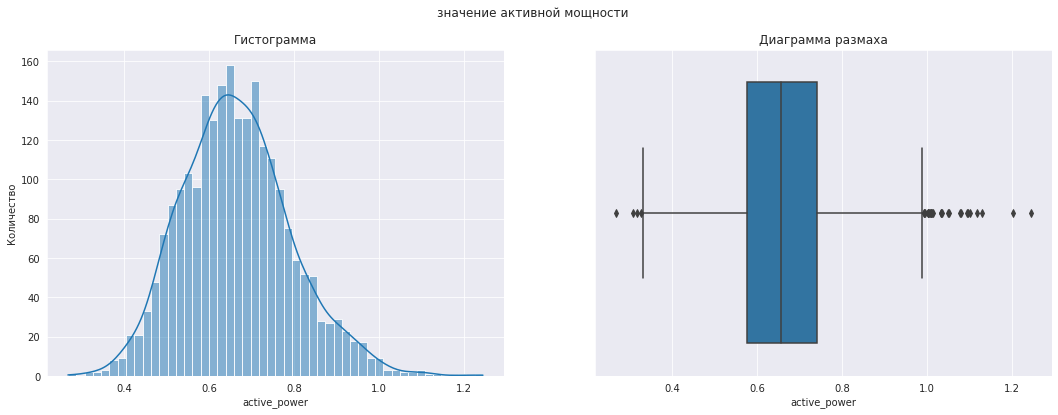

In [59]:
qua_plot(data, 'active_power', 'значение активной мощности')

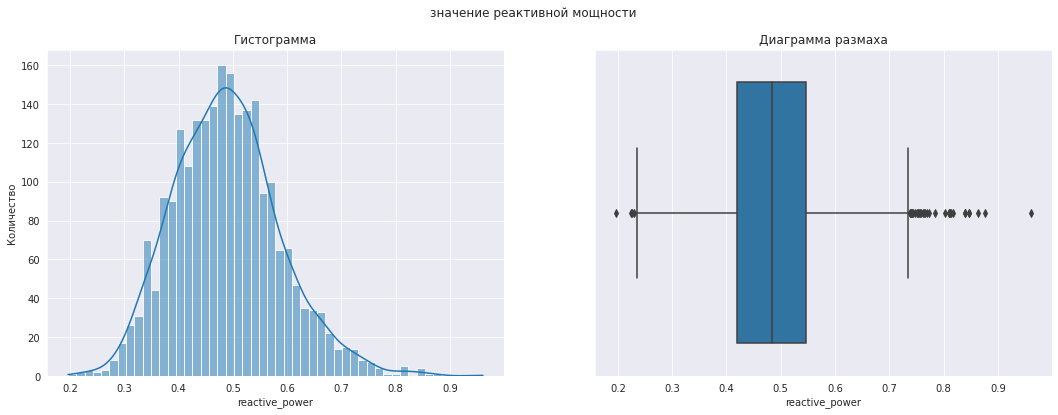

In [60]:
qua_plot(data, 'reactive_power', 'значение реактивной мощности')

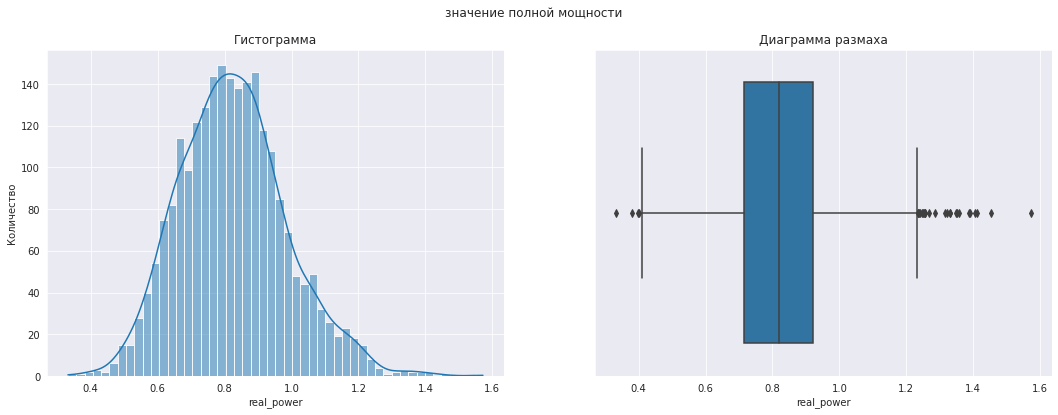

In [61]:
qua_plot(data, 'real_power', 'значение полной мощности')

распределения стали нормальными без смещения влево

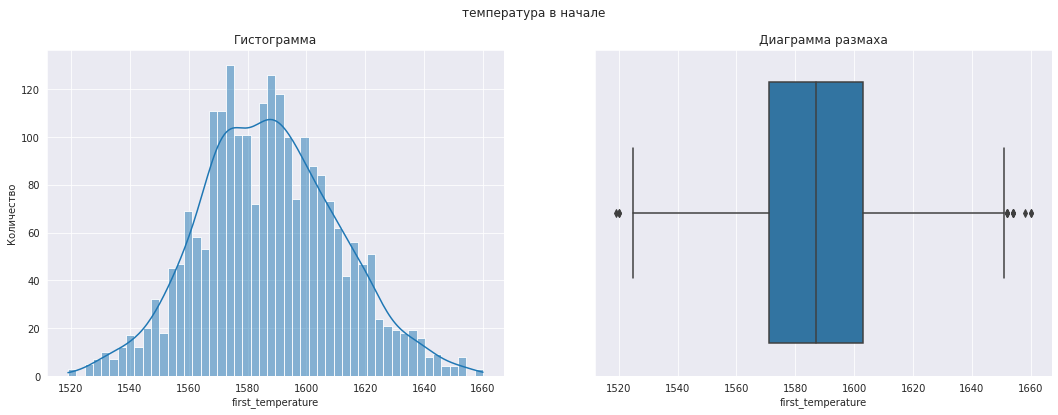

In [62]:
qua_plot(data, 'first_temperature', 'температура в начале')

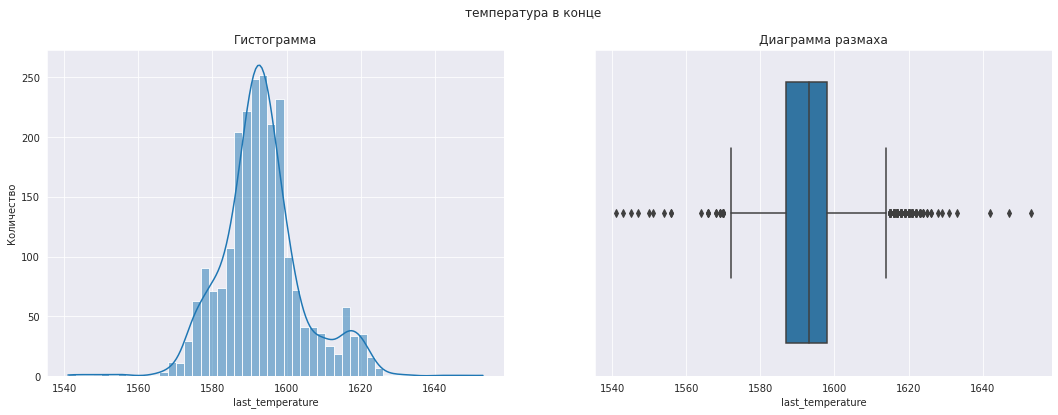

In [63]:
qua_plot(data, 'last_temperature', 'температура в конце')

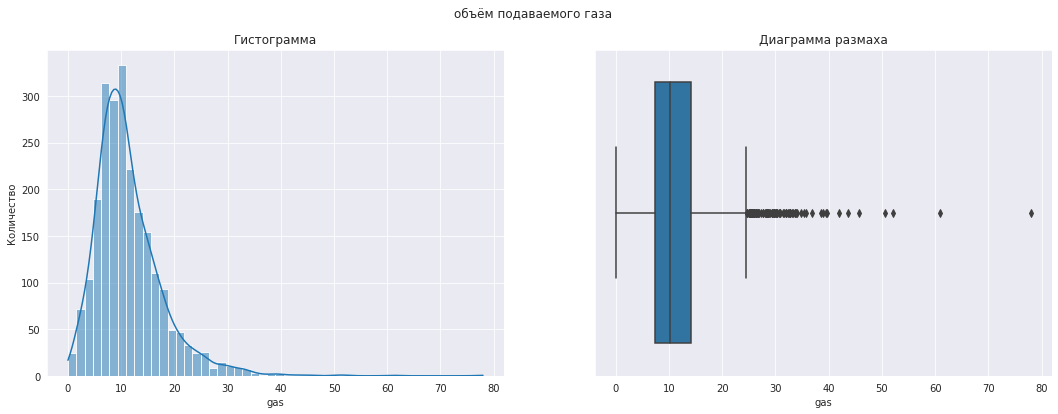

In [64]:
qua_plot(data, 'gas', 'объём подаваемого газа')

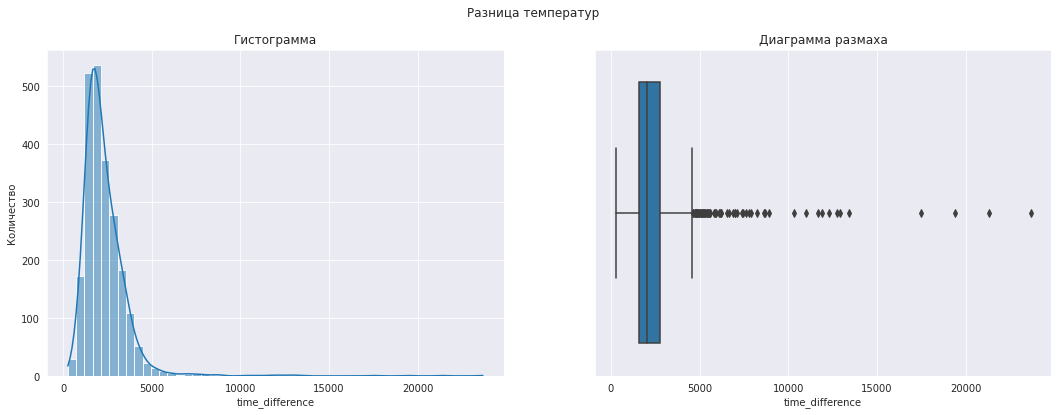

In [65]:
qua_plot(data, 'time_difference', 'Разница температур')

 так как распределения нормальные будем строить `heatplot` с помощью коэффициента корреляции Пирсона 

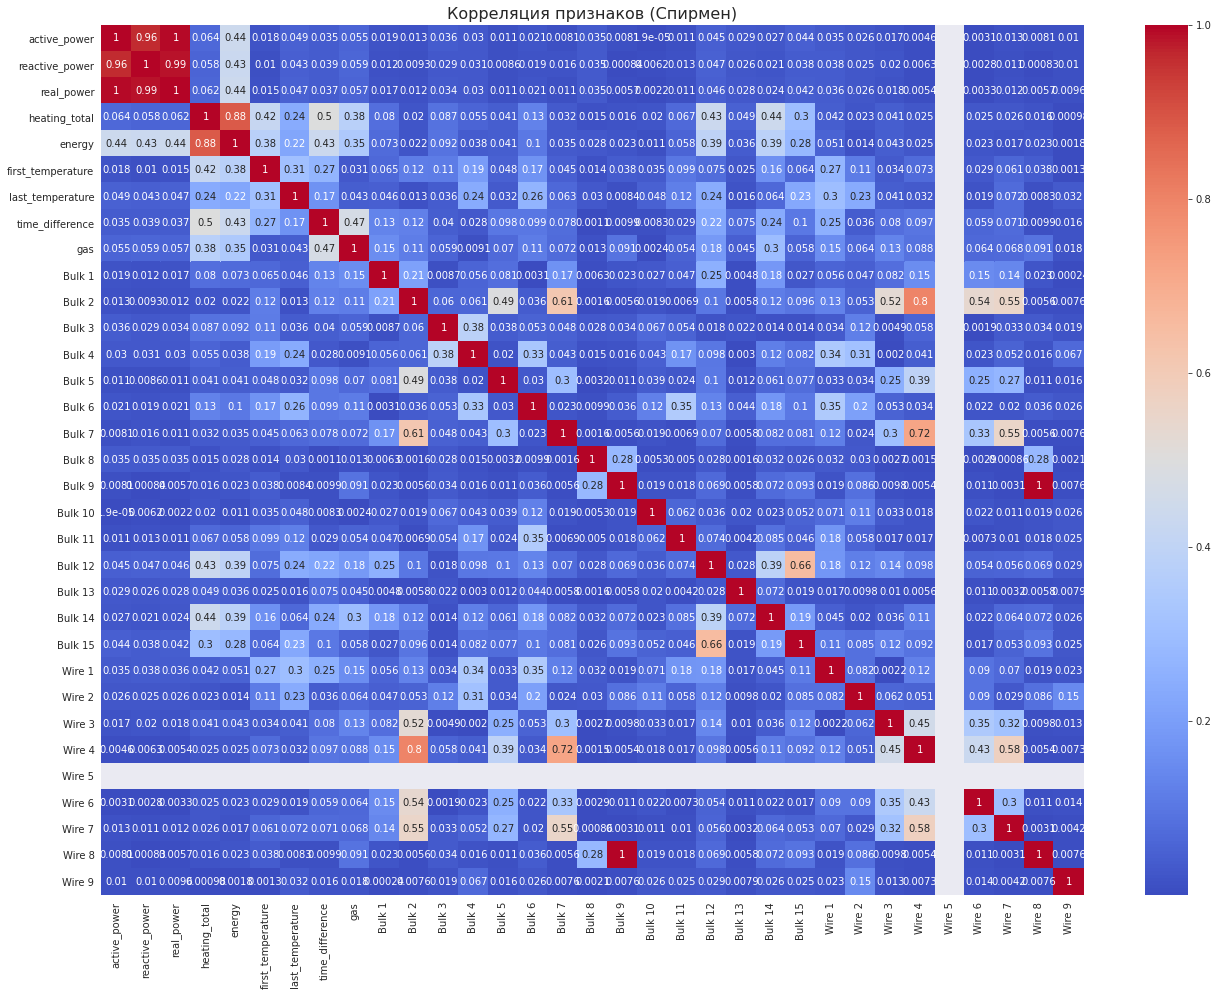

In [66]:
plt.figure(figsize=(22, 16))

fig = sns.heatmap(data.corr(method='spearman').abs(), cmap='coolwarm', annot=True)
plt.title('Корреляция признаков (Спирмен)', fontsize=16)
plt.setp(fig.get_xticklabels(), rotation=90)
plt.show()

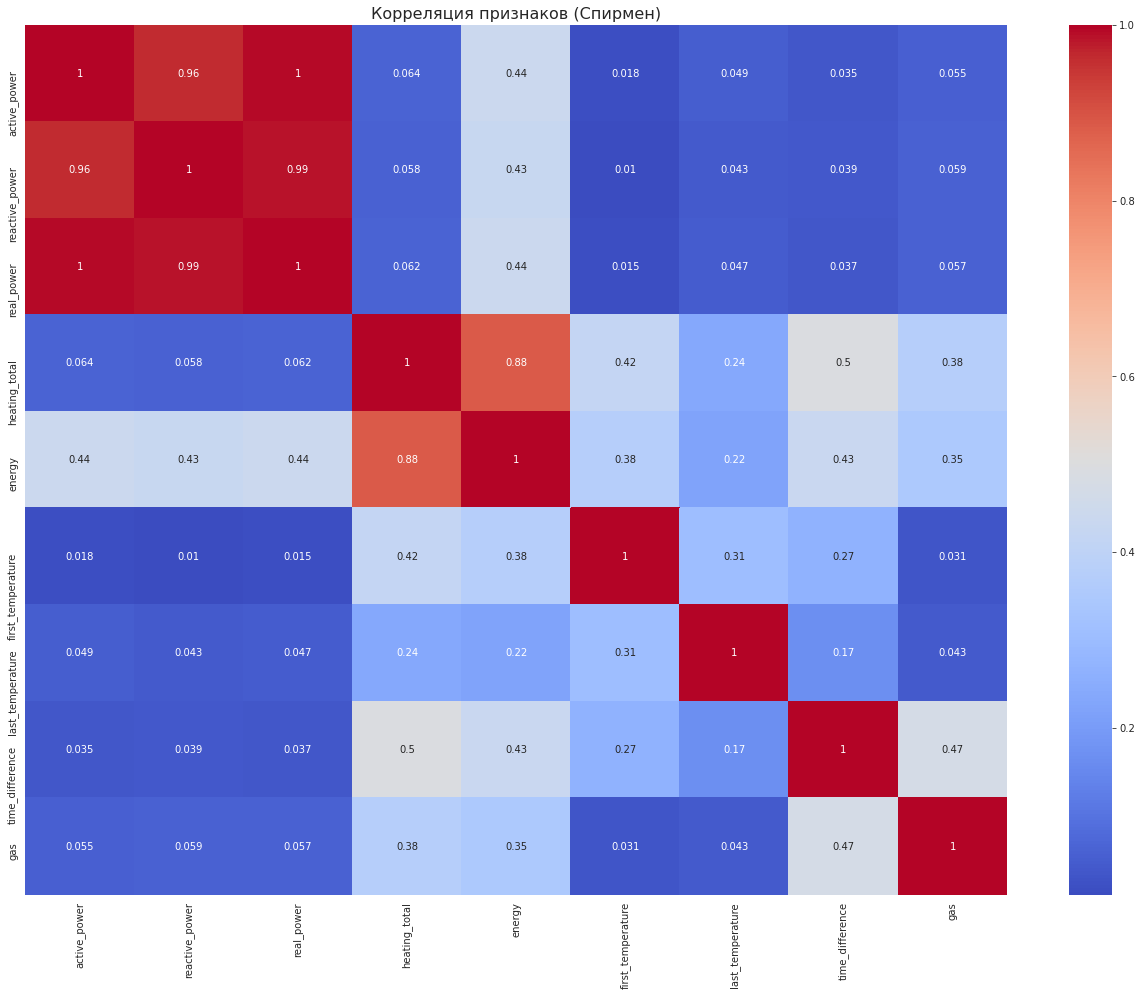

In [67]:
dr = [
    'Bulk 1', 'Bulk 2', 'Bulk 3', 'Bulk 4', 'Bulk 5', 'Bulk 6',
    'Bulk 7', 'Bulk 8', 'Bulk 9', 'Bulk 10', 'Bulk 11', 'Bulk 12',
    'Bulk 13', 'Bulk 14', 'Bulk 15',
    'Wire 1', 'Wire 2', 'Wire 3', 'Wire 4', 'Wire 5',
    'Wire 6', 'Wire 7', 'Wire 8', 'Wire 9'
]

data_heat = data.drop(columns=dr)

plt.figure(figsize=(22, 16))
fig = sns.heatmap(data_heat.corr(method='spearman').abs(), cmap='coolwarm', annot=True)
plt.title('Корреляция признаков (Спирмен)', fontsize=16)
plt.setp(fig.get_xticklabels(), rotation=90)
plt.show()


есть сильная мультиколлинеарность между признаками `active_power` `reactive_power` `real_power`, и между `energy` `heating_total` и `wire 8` `Bulk 9`

Удалим `active_power` `reactive_power`, `heating_total`, `Wire 8`

In [68]:
data = data.drop(['active_power', 'reactive_power', 'heating_total', 'Wire 8', 'Wire 5'], axis=1)


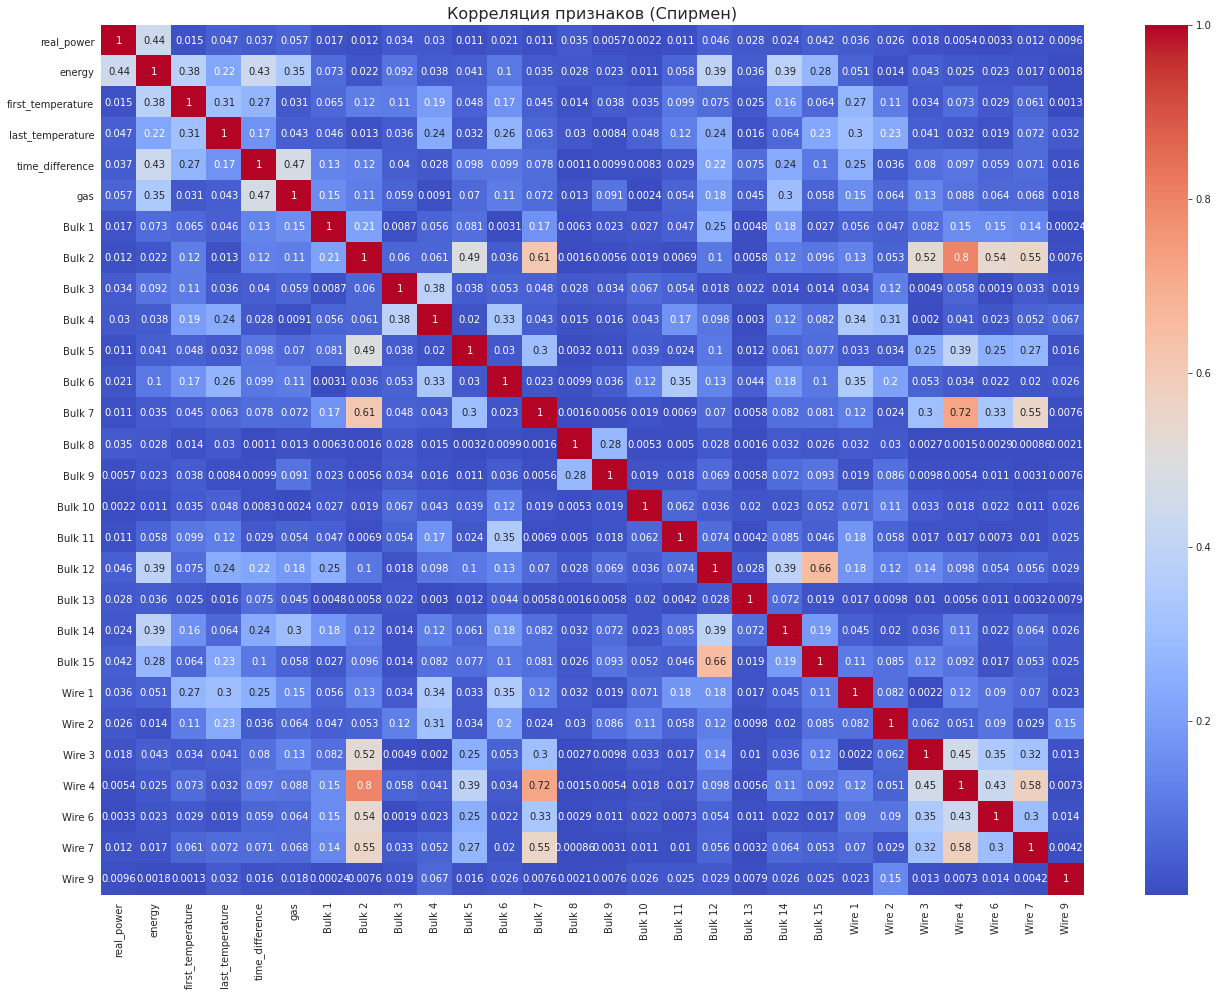

In [69]:
plt.figure(figsize=(22, 16))
fig = sns.heatmap(data.corr(method='spearman').abs(), cmap='coolwarm', annot=True)
plt.title('Корреляция признаков (Спирмен)', fontsize=16)
plt.setp(fig.get_xticklabels(), rotation=90)
plt.show()

### Промежуточный вывод
Проверили распределения признаков, далее построили хитмапу с помощью коэффициента корреляции Пирсона, выявили мультиколлинеарность и удалили связанные признаки

In [70]:
data

,real_power,energy,first_temperature,last_temperature,time_difference,gas,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15,Wire 1,Wire 2,Wire 3,Wire 4,Wire 6,Wire 7,Wire 9
0,0.743747,770.282114,1571.0,1613.0,1714,29.749986,0,0,0,43,0,0,0,0,0,0,0,206,0,150,154,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0
1,0.647087,481.760005,1581.0,1602.0,1265,12.555561,0,0,0,73,0,0,0,0,0,0,0,206,0,149,154,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0
2,1.003845,722.837668,1596.0,1599.0,1753,28.554793,0,0,0,34,0,0,0,0,0,0,0,205,0,152,153,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0
3,0.850010,683.455597,1601.0,1625.0,1220,18.841219,0,0,0,81,0,0,0,0,0,0,0,207,0,153,154,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0
4,0.704245,512.169934,1576.0,1602.0,1536,5.413692,0,0,0,78,0,0,0,0,0,0,0,203,0,151,152,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2324,0.967180,694.177326,1570.0,1591.0,1380,7.125735,0,0,21,0,0,0,0,0,0,90,0,256,0,129,223,89.150879,0.00000,0.0,0.0,0.0,0.0,0.0
2325,0.845053,815.818538,1554.0,1591.0,1705,9.412616,0,0,0,63,0,0,0,0,0,122,0,256,0,129,226,114.179527,0.00000,0.0,0.0,0.0,0.0,0.0
2326,1.453639,823.020520,1571.0,1589.0,962,6.271699,0,0,0,85,0,0,0,0,0,0,0,230,0,124,226,94.086723,9.04800,0.0,0.0,0.0,0.0,0.0
2327,0.781983,581.810739,1591.0,1594.0,1520,14.953657,0,0,90,0,0,0,0,0,0,101,0,206,0,129,207,118.110717,0.00000,0.0,0.0,0.0,0.0,0.0


## Подготовка данных

In [71]:
y = data['last_temperature']
X = data.drop('last_temperature', axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.25, 
    random_state=RANDOM_STATE
)

In [72]:
display(X_train.shape)
display(y_train.shape)
display(X_test.shape)
display(y_test.shape)

(1746, 27)

(1746,)

(583, 27)

(583,)

### Промежуточный вывод
Разделили выборку в соотношение 1/4

## Обучение моделей машинного обучения

### LinearRegression

In [73]:
%%time

lin_model = LinearRegression()

scores = cross_val_score(lin_model, X, y, cv=5, scoring='neg_mean_absolute_error')
mae_scores = -scores

print(f"MAE на кросс-валидации: {mae_scores.mean()}")


MAE на кросс-валидации: 6.338071096390712
CPU times: user 218 ms, sys: 221 ms, total: 439 ms
Wall time: 403 ms


### CatBoost

In [74]:
%%time
cat_model = CatBoostRegressor(verbose=0, random_state=RANDOM_STATE)

param_grid = {
    'depth': [6],
    'learning_rate': [0.01, 0.05],
    'iterations': [200, 500]
}

cat_grid = GridSearchCV(
    estimator=cat_model,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=5,
    n_jobs=-1,
    verbose=2
)

cat_grid.fit(X_train, y_train)

print("Лучшие параметры:", cat_grid.best_params_)
print("MAE на кросс-валидации:", -cat_grid.best_score_)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ........depth=6, iterations=200, learning_rate=0.01; total time=   1.5s
[CV] END ........depth=6, iterations=200, learning_rate=0.01; total time=   1.4s
[CV] END ........depth=6, iterations=200, learning_rate=0.01; total time=   1.4s
[CV] END ........depth=6, iterations=200, learning_rate=0.01; total time=   1.6s
[CV] END ........depth=6, iterations=200, learning_rate=0.01; total time=   1.4s
[CV] END ........depth=6, iterations=200, learning_rate=0.05; total time=   1.7s
[CV] END ........depth=6, iterations=200, learning_rate=0.05; total time=   1.3s
[CV] END ........depth=6, iterations=200, learning_rate=0.05; total time=   1.7s
[CV] END ........depth=6, iterations=200, learning_rate=0.05; total time=   1.4s
[CV] END ........depth=6, iterations=200, learning_rate=0.05; total time=   1.5s
[CV] END ........depth=6, iterations=500, learning_rate=0.01; total time=   2.4s
[CV] END ........depth=6, iterations=500, learnin

### RandomForest

In [75]:
%%time

rf_model = RandomForestRegressor(random_state=RANDOM_STATE)

param_grid = {
    'n_estimators': [50, 100, 500],
    'max_depth': [6, 10, 14],
    'min_samples_split': [2, 4, 8]
}

rf_grid = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=5,
    n_jobs=-1,
    verbose=2
)

rf_grid.fit(X_train, y_train)

print("Лучшие параметры:", rf_grid.best_params_)
print("MAE на кросс-валидации:", -rf_grid.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ..max_depth=6, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END ..max_depth=6, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END ..max_depth=6, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END ..max_depth=6, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END ..max_depth=6, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END .max_depth=6, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END .max_depth=6, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END .max_depth=6, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END .max_depth=6, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END .max_depth=6, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END .max_depth=6, min_samples_split=2, n_estimators=500; total time=   2.6s
[CV] END .max_depth=6, min_samples_split=2, n_e

### Промежуточный вывод
Обучили три модели (`LinearRegression`, `CatBoost`, `RandomForest`), для подборки гиперпараметров использовали `GridSearchCV`

Лучшей моделью по метрике `MAE` на кросс-валидации стала `CatBoost` (MAE на кросс-валидации: 6.217)

## Выбор лучшей модели

`CatBoost` показала лучшие результаты, по этому будем использовать данную модель на тестовой выборке

In [76]:
best_cat_model = cat_grid.best_estimator_

predictions = best_cat_model.predict(X_test)

mae_test = mean_absolute_error(y_test, predictions)
print(f"MAE на тестовой выборке: {mae_test}")


MAE на тестовой выборке: 5.976193730101116


Модель показала отличный результат на тестовой выборке 5.976

Проверим важность признаков у лучшей модели 



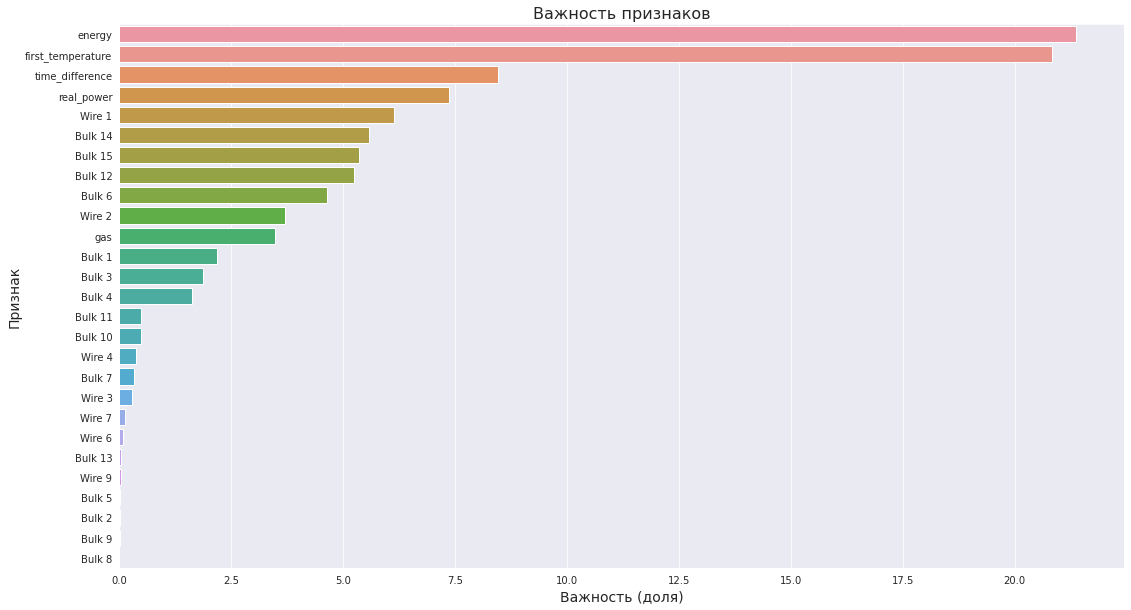

In [77]:
feature_importances = pd.DataFrame(
    {
        'Feature': X_train.columns,
        'Importance': best_cat_model.feature_importances_
    }).sort_values('Importance', ascending=False)

plt.figure(figsize=(18, 10))

ax = sns.barplot(x='Importance', y='Feature', data=feature_importances)

ax.set_title('Важность признаков', fontsize=16)
ax.set_xlabel('Важность (доля)', fontsize=14)
ax.set_ylabel('Признак', fontsize=14)

plt.show()

### Промежуточный вывод
протестировали модель `CatBoost` на тестовой выборке, она показала хорошие результаты (MAE = 5.98)

оценили важность признаков для модели, наиболее важными оказались `energy`, `first_temperature` и `time_difference`

## Общий вывод
Целью работы являлась оптимизация производственных расходов, была задача спрогнозировать финальную температуру стали в ковше. 

Изначально необработанные данные имели 3241 партию из которых было выделены 2329 партий. Датасеты `data_bulk_time_new`, `data_wire_time_new` и `data_wire_time_new` не несут ценности для определния целевого признака по этому были отброшены. Партии где температура была ниже 1400 считаем как брак. Так же отброшенны партии где был лишь один замер температуры.

Объеденим датасеты получили финальный датасет `data`, в котором проведя корреляционный анализ была выявлена и устранена мультиколлинеарность между признаками.

Были выбраны три модели (LinearRegression, CatBoost, RandomForest), для подборки гиперпараметров использовали GridSearchCV. Лучшей моделью по метрике MAE на кросс-валидации стала CatBoost (MAE на кросс-валидации: 6.217)

Наконец проведя замеры на тестовой выборке, получили значение метрики равное `MAE = 5.98`, что удовлетворяет условие `MAE < 6.8`

**Рекомендации заказчику**
* Стоит обратить внимание на насадку `wire 1`, она является важным признаком.
* Замерять время температуры на всех итерациях для более полного датасета.

In [78]:
data.head()

,real_power,energy,first_temperature,last_temperature,time_difference,gas,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15,Wire 1,Wire 2,Wire 3,Wire 4,Wire 6,Wire 7,Wire 9
0,0.743747,770.282114,1571.0,1613.0,1714,29.749986,0,0,0,43,0,0,0,0,0,0,0,206,0,150,154,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0
1,0.647087,481.760005,1581.0,1602.0,1265,12.555561,0,0,0,73,0,0,0,0,0,0,0,206,0,149,154,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0
2,1.003845,722.837668,1596.0,1599.0,1753,28.554793,0,0,0,34,0,0,0,0,0,0,0,205,0,152,153,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0
3,0.850010,683.455597,1601.0,1625.0,1220,18.841219,0,0,0,81,0,0,0,0,0,0,0,207,0,153,154,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0
4,0.704245,512.169934,1576.0,1602.0,1536,5.413692,0,0,0,78,0,0,0,0,0,0,0,203,0,151,152,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0


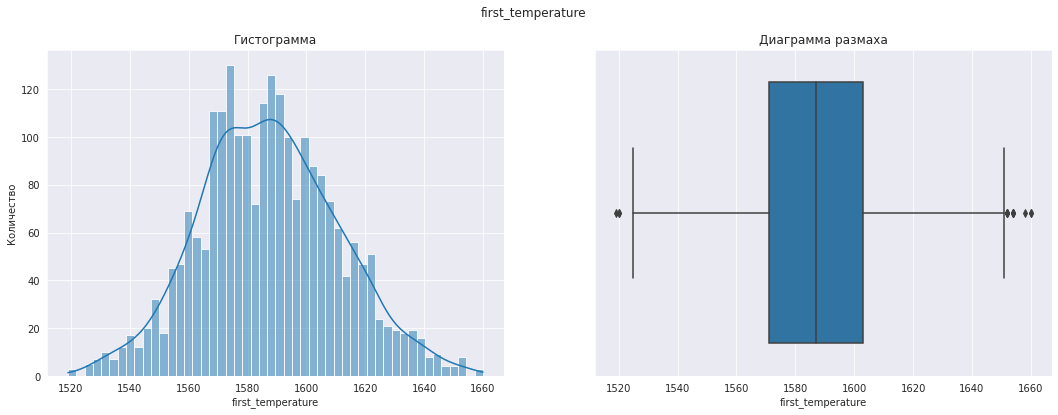

In [79]:
qua_plot(data, 'first_temperature', 'first_temperature')

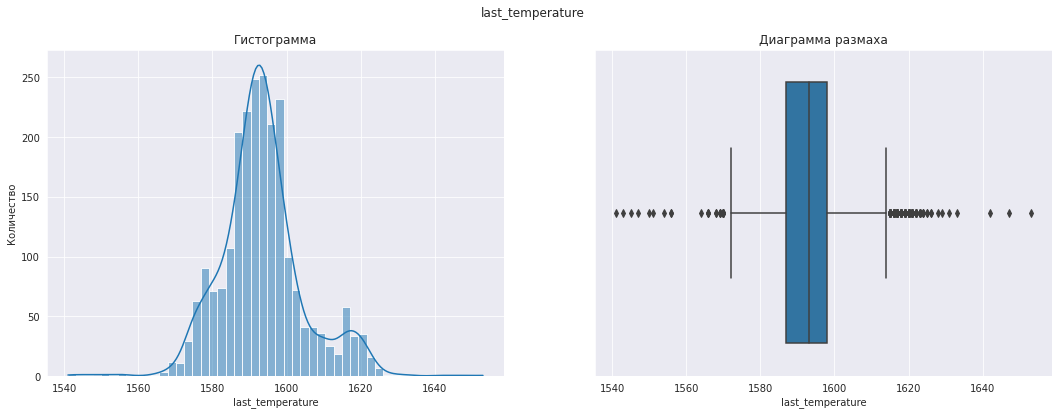

In [80]:
qua_plot(data, 'last_temperature', 'last_temperature')

In [81]:
q1 = data['first_temperature'].quantile(0.20)
q3 = data['first_temperature'].quantile(0.80)

print(f"20-й перцентиль (Q1) = {q1}")
print(f"80-й перцентиль (Q3) = {q3}")


20-й перцентиль (Q1) = 1568.0
80-й перцентиль (Q3) = 1607.0


In [82]:
q1 = data['last_temperature'].quantile(0.20)
q3 = data['last_temperature'].quantile(0.80)

print(f"20-й перцентиль (Q1) = {q1}")
print(f"80-й перцентиль (Q3) = {q3}")


20-й перцентиль (Q1) = 1585.0
80-й перцентиль (Q3) = 1600.0


In [83]:
data['normol'] = ((data['first_temperature'] >= 1568.0) & 
                  (data['first_temperature'] <= 1607.0)).astype(int)


In [84]:
data['normol'].value_counts()

1    1419
0     910
Name: normol, dtype: int64

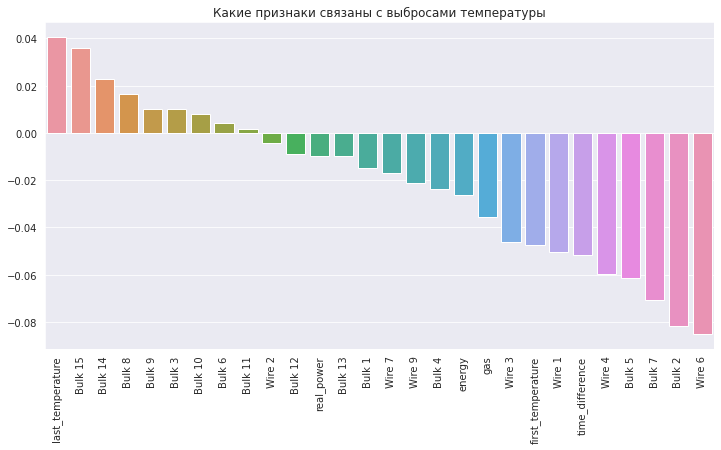

In [85]:
num_features = data.select_dtypes(include='number').columns.drop('normol')

corr_with_normol = data[num_features].corrwith(data['normol']).sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=corr_with_normol.index, y=corr_with_normol.values)
plt.xticks(rotation=90)
plt.title('Какие признаки связаны с выбросами температуры')
plt.show()

В основном `Bulk` влияет на выход температуры за границу